In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import anndata
from vireoSNP import BinomMixtureVB
import sklearn.metrics
from scipy.stats import binom



plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# my code
%load_ext autoreload
%autoreload 2
from passenger.plot.plot import *


/home/vmarotl/anaconda3/envs/passenger/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
AML_S2_patients = np.array(["P"+str(i) for i in np.arange(1, 5)])
AML_10X_patients = np.array(["A"+str(i) for i in np.arange(1, 16)])
LUNG_patients = ["p018", "p019", "p023", "p030", "p031","p032", "p033"]
CRC_patient = ["p007", "p013", "p014", "p016", "p020", "p026"]

In [4]:
AML_S2_adata = []

Cdiff_sub_cells = .3

for patient in AML_S2_patients:
    print(patient)
    
    file = "/home/vmarotl/fast/mutaseq/scripts/clonal_tracing_notebooks/processed_data/AML_MutaSeq/"+patient+".h5ad"
    
    adata = anndata.read_h5ad(file)

    if "vireo_ID_prob" not in adata.obsm.keys():
        AD = adata.layers["ALT"].T
        DP = adata.X.T

        _model = BinomMixtureVB(n_var=AD.shape[0], n_cell=AD.shape[1], n_donor=2)
        _model.fit(AD, DP)

        uq, blast_counts = np.unique(np.argmax(_model.ID_prob[np.array(adata.obs["cell_labels"]=='cancer')], axis=1), return_counts=True)

        print(uq, blast_counts, np.argmax(blast_counts))

        idx = [0, 1] if np.argmax(blast_counts)==0 else [1, 0]
        adata.obsm["vireo_ID_prob"] = _model.ID_prob[:,idx]
        adata.varm["vireo_var_prob"]=_model.beta_mu[:,idx]
    
    adata.write_h5ad(file)
    AML_S2_adata.append(adata)

P1
P2
P3
P4


In [5]:
AML_10X_adata = []
healthy_cells = ['B cells', 'T cells', 'NK cells']

for patient in AML_10X_patients:
    print(patient)
    
    file = "/home/vmarotl/fast/mutaseq/scripts/clonal_tracing_notebooks/processed_data/AML_10X/"+patient+".h5ad"
    
    adata = anndata.read_h5ad(file)
    
    if ("cell_labels" not in adata.obs.keys()) | ('ref_assignments' not in adata.obsm.keys()):
        AML_10X_adata.append(None)
        continue

    if "vireo_ID_prob" not in adata.obsm.keys():
        AD = adata.layers["ALT"].T
        DP = adata.X.T

        _model = BinomMixtureVB(n_var=AD.shape[0], n_cell=AD.shape[1], n_donor=2)
        _model.fit(AD, DP)
    
        uq, blast_counts = np.unique(np.argmax(_model.ID_prob[[i in healthy_cells for i in adata.obs["celltype"]]], axis=1), return_counts=True)

        print(uq, blast_counts, np.argmax(blast_counts))

        idx = [0, 1] if np.argmax(blast_counts)==1 else [1, 0]
        adata.obsm["vireo_ID_prob"] = _model.ID_prob[:,idx]
        adata.varm["vireo_var_prob"]=_model.beta_mu[:,idx]
    
    adata.write_h5ad(file)
    AML_10X_adata.append(adata)

A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
A15


In [6]:
LUNG_adata = []

for patient in LUNG_patients:
    print(patient)
    
    file = "/home/vmarotl/fast/mutaseq/scripts/clonal_tracing_notebooks/processed_data/LUNG/"+patient+".h5ad"
    
    adata = anndata.read_h5ad(file)
    
    if ("cell_labels" not in adata.obs.keys()) | ('ref_assignments' not in adata.obsm.keys()):
        LUNG_adata.append(None)
        continue

    if "vireo_ID_prob" not in adata.obsm.keys():
        AD = adata.layers["ALT"].T
        DP = adata.X.T

        _model = BinomMixtureVB(n_var=AD.shape[0], n_cell=AD.shape[1], n_donor=2)
        _model.fit(AD, DP)        
    
        uq, blast_counts = np.unique(np.argmax(_model.ID_prob[np.array( adata.obs["celltype"]=="Tumor")], axis=1), return_counts=True)

        print(uq, blast_counts, np.argmax(blast_counts))

        idx = [0, 1] if np.argmax(blast_counts)==0 else [1, 0]
        adata.obsm["vireo_ID_prob"] = _model.ID_prob[:,idx]
        adata.varm["vireo_var_prob"]= _model.beta_mu[:,idx]
    
    
    adata.write_h5ad(file)
    LUNG_adata.append(adata)

p018
p019
p023
p030
p031
p032
p033


In [7]:
CRC_adata = []

for patient in CRC_patient:
    print(patient)
    
    file = "/home/vmarotl/fast/mutaseq/scripts/clonal_tracing_notebooks/processed_data/CRC/"+patient+".h5ad"
    
    adata = anndata.read_h5ad(file)
    
    if ("cell_labels" not in adata.obs.keys()) | ('ref_assignments' not in adata.obsm.keys()):
        CRC_adata.append(None)
        continue

    if "vireo_ID_prob" not in adata.obsm.keys():
        AD = adata.layers["ALT"].T
        DP = adata.X.T

        _model = BinomMixtureVB(n_var=AD.shape[0], n_cell=AD.shape[1], n_donor=2)
        _model.fit(AD, DP)        
    
        uq, blast_counts = np.unique(np.argmax(_model.ID_prob[np.array( adata.obs["celltype"]=="Tumour")], axis=1), return_counts=True)

        print(uq, blast_counts, np.argmax(blast_counts))

        idx = [0, 1] if np.argmax(blast_counts)==0 else [1, 0]
        adata.obsm["vireo_ID_prob"] = _model.ID_prob[:,idx]
        adata.varm["vireo_var_prob"]= _model.beta_mu[:,idx]
    
    
    adata.write_h5ad(file)
    CRC_adata.append(adata)

p007
p013
p014
p016
p020
p026


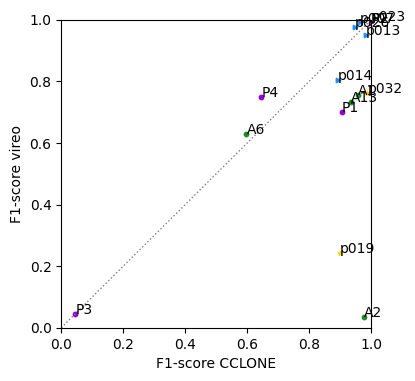

In [8]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
for i, adata in enumerate(AML_S2_adata):

    sub = (adata.obs.cell_labels != "undetermined").tolist()
    adata = adata[sub]
    our_cancer = np.array(adata.obs.cell_labels == "cancer")
    viero_cancer = np.array(adata.obsm["vireo_ID_prob"][:,0] > .5)

    ref_cancer = np.array(adata.obsm["ref_assignments"]["PhiSICShealthy"]<0.5 if i<2 else adata.obsm["ref_assignments"]["cancer_final"])
    sub = ~np.isnan(ref_cancer)
    
    f1 = sklearn.metrics.f1_score(ref_cancer[sub], our_cancer[sub])
    vireo_f1 = sklearn.metrics.f1_score(ref_cancer[sub], viero_cancer[sub])

    ax.scatter(f1, vireo_f1, marker="o", s=10, c="darkviolet")
    ax.annotate(AML_S2_patients[i], (f1, vireo_f1))
    

for i, adata in enumerate(AML_10X_adata):
    if adata is None:
        continue

    sub = (adata.obs.cell_labels != "undetermined").tolist()
    adata = adata[sub]
    our_cancer = np.array(adata.obs.cell_labels == "cancer")
    viero_cancer = np.array(adata.obsm["vireo_ID_prob"][:,0] > .5)

    ref_cancer = np.array(adata.obsm["ref_assignments"]["Healthy"]<0.5) #if i<2 else adata.obsm["ref_assignments"]["cancer_final"])
    sub = ~np.isnan(ref_cancer)
    
    f1 = sklearn.metrics.f1_score(ref_cancer[sub], our_cancer[sub])
    vireo_f1 = sklearn.metrics.f1_score(ref_cancer[sub], viero_cancer[sub])

    ax.scatter(f1, vireo_f1, marker="o", s=10, c="forestgreen")
    ax.annotate(AML_10X_patients[i], (f1, vireo_f1))
    
    
for i, adata in enumerate(LUNG_adata):
    if adata is None:
        continue

    sub = (adata.obs.cell_labels != "undetermined").tolist()
    adata = adata[sub]
    our_cancer = np.array(adata.obs.cell_labels == "cancer")
    viero_cancer = np.array(adata.obsm["vireo_ID_prob"][:,0] > .5)

    ref_cancer = np.array(adata.obsm["ref_assignments"]["cna_clone"]=="CNA") 
    sub = ~np.isnan(ref_cancer)
    
    f1 = sklearn.metrics.f1_score(ref_cancer[sub], our_cancer[sub])
    vireo_f1 = sklearn.metrics.f1_score(ref_cancer[sub], viero_cancer[sub])

    ax.scatter(f1, vireo_f1, marker="*", s=10, c="gold")
    ax.annotate(LUNG_patients[i], (f1, vireo_f1))
    
for i, adata in enumerate(CRC_adata):
    if adata is None:
        continue

    sub = (adata.obs.cell_labels != "undetermined").tolist()
    adata = adata[sub]
    our_cancer = np.array(adata.obs.cell_labels == "cancer")
    viero_cancer = np.array(adata.obsm["vireo_ID_prob"][:,0] > .5)

    ref_cancer = np.array(adata.obsm["ref_assignments"]["consensus_call"]=="genomically_tumour") 
    sub = ~np.isnan(ref_cancer)
    f1 = sklearn.metrics.f1_score(ref_cancer[sub], our_cancer[sub])
    vireo_f1 = sklearn.metrics.f1_score(ref_cancer[sub], viero_cancer[sub])

    ax.scatter(f1, vireo_f1, marker=">", s=10, c="dodgerblue")
    ax.annotate(CRC_patient[i], (f1, vireo_f1))
    
ax.set_xlim(0, 1), ax.set_ylim(0, 1)
ax.plot([0, 1], [0, 1], linewidth=1, color="grey", linestyle=':' )
    
ax.set_xlabel("F1-score CCLONE")
ax.set_ylabel("F1-score vireo")

plt.savefig("../figures/SXX_vireo.png", dpi=300)